Modularity on the Karate Club Graph

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.linalg.modularitymatrix import modularity_matrix

In [10]:
# use a function to do recursive bisection to detect multiple communities
# graph should be drawn using a fixed spring layout
# assign a unique colour to each community
# compute node metrics after each split
# procedure: we have a graph G(V,E). Make a graph with 34 nodes and 78 edges
# make sure it is a connected graph?
# import networkx and build the karate club graph
# we start with the full vertex set V with all nodes
# calculate the modularity matrix B for all the nodes
# find the leading eigenvector and eigenvalue(largest)
# Find the leading eigenvector: the one associated with the largest eigenvalue.
# Check if this eigenvalue is positive (indicates a modularity gain is possible).
# For each node, look at the corresponding value in the leading eigenvector:
# If it's positive, assign the node to Group 1.
# If it's negative, assign the node to Group 2.
# now we have 2 communities, each is an induced subgraph
# now repeat this process for each subgraph
# if the leading eigenvalue(largest) is negative/ the group is too small(3). stop splitting

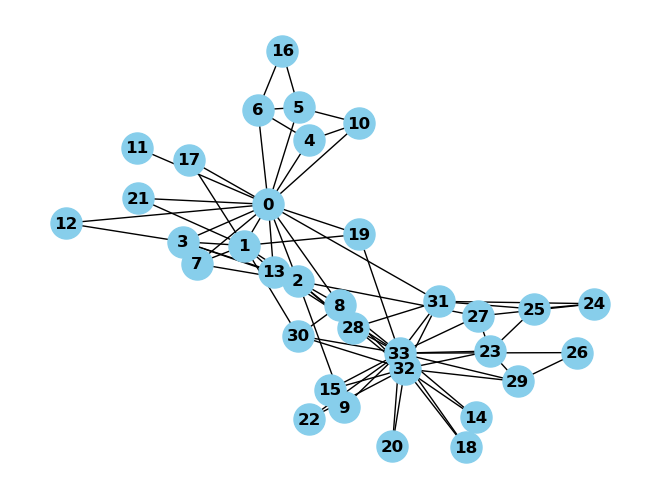

In [11]:
import networkx as nx
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed = 42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', font_weight='bold', node_size=500)

In [12]:
# Modularity matrix for the entire set of nodes
# B = A - k(i)k(j)/2m
vertex_set = list(G.nodes())
print(vertex_set)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [13]:
for node in list(G.nodes()):
    #to compute the adjacency matrix
    adjacency_matrix = list(G.edges())
    #print(adjacency_matrix)

In [14]:
# adjacency matrix
n = len(list(G.nodes()))
nodes = list(G.nodes())
A = np.zeros((n ,n))
for i in range(n):
    for j in range(n):
        if (nodes[i], nodes[j]) in list(G.edges()) or (nodes[j], nodes[i]) in list(G.edges()): 
            A[i,j] = 1 
print(A)

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [15]:
# A1 = nx.to_numpy_array(G, dtype=int)
# print(A1)

In [16]:
# Number of edges
m = G.number_of_edges()

# Degree vector k
k = np.array([degree for node, degree in G.degree()])

# Outer product kk^T
kkT = np.outer(k, k)

# Compute kk^T / (2m)
kkT_div = kkT / (2 * m)

print("Degree vector k:", k)
print("Matrix kk^T / 2m:\n", kkT_div)


Degree vector k: [16  9 10  6  3  4  4  4  5  2  3  1  2  5  2  2  2  2  2  3  2  2  2  5
  3  3  2  4  3  4  4  6 12 17]
Matrix kk^T / 2m:
 [[1.64102564 0.92307692 1.02564103 ... 0.61538462 1.23076923 1.74358974]
 [0.92307692 0.51923077 0.57692308 ... 0.34615385 0.69230769 0.98076923]
 [1.02564103 0.57692308 0.64102564 ... 0.38461538 0.76923077 1.08974359]
 ...
 [0.61538462 0.34615385 0.38461538 ... 0.23076923 0.46153846 0.65384615]
 [1.23076923 0.69230769 0.76923077 ... 0.46153846 0.92307692 1.30769231]
 [1.74358974 0.98076923 1.08974359 ... 0.65384615 1.30769231 1.8525641 ]]


In [17]:
# modularity matrix
B = A - kkT_div
print(B)

[[-1.64102564  0.07692308 -0.02564103 ...  0.38461538 -1.23076923
  -1.74358974]
 [ 0.07692308 -0.51923077  0.42307692 ... -0.34615385 -0.69230769
  -0.98076923]
 [-0.02564103  0.42307692 -0.64102564 ... -0.38461538  0.23076923
  -1.08974359]
 ...
 [ 0.38461538 -0.34615385 -0.38461538 ... -0.23076923  0.53846154
   0.34615385]
 [-1.23076923 -0.69230769  0.23076923 ...  0.53846154 -0.92307692
  -0.30769231]
 [-1.74358974 -0.98076923 -1.08974359 ...  0.34615385 -0.30769231
  -1.8525641 ]]


In [18]:
# finding the leading eigenvector and eigenvalue of the modularity matrix for the full node set V
# for i,j in B[i,j]:
    # if i=j
eigenvalues, eigenvectors = np.linalg.eig(B)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors: ", eigenvectors)

max_index = np.argmax(eigenvalues)
max_eigenvector = eigenvectors[:, max_index]
    
eigenvalues = np.sort(eigenvalues)[::-1]  # descending order
print("Max eigenvalue: ", max(eigenvalues))
print("Corresponding Eigenvector:\n", max_eigenvector)


Eigenvalues: [-5.59249634e+00+0.00000000e+00j  4.97708023e+00+0.00000000e+00j
  3.04278102e+00+0.00000000e+00j -3.45111371e+00+0.00000000e+00j
 -3.12663799e+00+0.00000000e+00j  2.32020502e+00+0.00000000e+00j
 -2.43920051e+00+0.00000000e+00j -2.09107775e+00+0.00000000e+00j
  1.48883282e+00+0.00000000e+00j  1.45942182e+00+0.00000000e+00j
 -1.68805729e+00+0.00000000e+00j -1.46632948e+00+0.00000000e+00j
 -1.19260232e+00+0.00000000e+00j -1.07838380e+00+0.00000000e+00j
 -7.92900927e-01+0.00000000e+00j -4.28208059e-01+0.00000000e+00j
  1.08328648e+00+0.00000000e+00j  1.03148518e+00+0.00000000e+00j
  8.38170794e-01+0.00000000e+00j  6.16764429e-01+0.00000000e+00j
  3.00015828e-01+0.00000000e+00j  4.19733784e-01+0.00000000e+00j
 -2.00000000e+00+0.00000000e+00j  2.76557542e-16+0.00000000e+00j
 -9.81784405e-17+1.71098777e-16j -9.81784405e-17-1.71098777e-16j
 -1.18708806e-16+5.19010369e-17j -1.18708806e-16-5.19010369e-17j
  1.71172473e-16+0.00000000e+00j  5.08631554e-17+1.04691556e-16j
  5.08631554

In [19]:
# splitting the graph for the 1st time
group1 = []
group2 = []
for value in max_eigenvector:
    if value < 0:
        group1.append(value)
    else:
        group2.append(value)
print("Group 1: ", group1)
print("Group 2: ", group2)

Group 1:  [(-0.054475713624720264+0j), (-0.0478523769091537+0j), (-0.13943288264641313+0j), (-0.13943288264641313+0j), (-0.13943288264641313+0j), (-0.13943288264641313+0j), (-0.13943288264641313+0j), (-0.21674712434353882+0j), (-0.0563304967150497+0j), (-0.07540038590340664+0j), (-0.11580256794135732+0j), (-0.10276486676894976+0j), (-0.06834027295276422+0j), (-0.20629456129341361+0j), (-0.09626390562457672+0j), (-0.10185677908136474+0j), (-0.32390453333971936+0j), (-0.3698378633280629+0j)]
Group 2:  [(0.3875429303211925+0j), (0.2695574218932867+0j), (0.1318989908275368+0j), (0.25345235695220647+0j), (0.13400323139230141+0j), (0.14573804098533008+0j), (0.14573804098533008+0j), (0.20935953611336885+0j), (0.13400323139230141+0j), (0.07784278925909384+0j), (0.12874396470296692+0j), (0.13502860919769766+0j), (0.058518211962265844+0j), (0.13197981066297826+0j), (0.05764888374730705+0j), (0.13197981066297826+0j)]


In [20]:
group1 = [nodes[i] for i, val in enumerate(max_eigenvector) if val < 0]
group2 = [nodes[i] for i, val in enumerate(max_eigenvector) if val >= 0]

print("Group 1 Nodes:", group1)
print("Group 2 Nodes:", group2)


Group 1 Nodes: [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Group 2 Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]


In [21]:
# computing node metrics after first split

# Create subgraphs for each group
G1 = G.subgraph(group1)
G2 = G.subgraph(group2)

# Compute node metrics for Group 1
print("Group 1 Node degrees:")
print(dict(G1.degree()))

print("Group 1 Clustering coefficient:")
print(nx.clustering(G1))

# Compute node metrics for Group 2
print("Group 2 Node degrees:")
print(dict(G2.degree()))

print("Group 2 Clustering coefficient:")
print(nx.clustering(G2))


Group 1 Node degrees:
{8: 3, 9: 1, 14: 2, 15: 2, 18: 2, 20: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 3, 28: 2, 29: 4, 30: 3, 31: 5, 32: 11, 33: 15}
Group 1 Clustering coefficient:
{8: 1.0, 9: 0, 14: 1.0, 15: 1.0, 18: 1.0, 20: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.3333333333333333, 28: 1.0, 29: 0.6666666666666666, 30: 1.0, 31: 0.3, 32: 0.21818181818181817, 33: 0.14285714285714285}
Group 2 Node degrees:
{0: 14, 1: 8, 2: 5, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 10: 3, 11: 1, 12: 2, 13: 4, 16: 2, 17: 2, 19: 2, 21: 2}
Group 2 Clustering coefficient:
{0: 0.18681318681318682, 1: 0.42857142857142855, 2: 0.9, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 1.0, 16: 1.0, 17: 1.0, 19: 1.0, 21: 1.0}


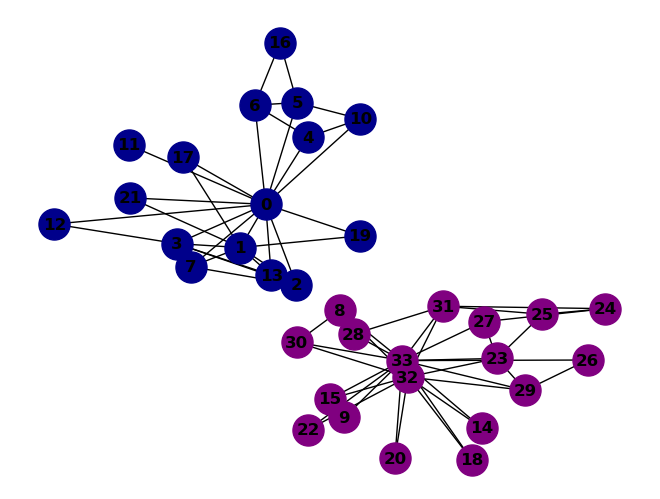

In [22]:
G1 = G.subgraph(group1)
pos = nx.spring_layout(G, seed = 42)
nx.draw(G1, pos, with_labels=True, node_color='purple', font_weight='bold', node_size=500)

G2 = G.subgraph(group2)
pos = nx.spring_layout(G, seed = 42)
nx.draw(G2, pos, with_labels=True, node_color='darkblue', font_weight='bold', node_size=500)

Max eigenvalue:  (2.3455566171605753+0j)
Group 1 Nodes: [23, 24, 25, 27, 28, 31]
Group 2 Nodes: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Max eigenvalue:  2.9706175763252523
Group 1 Nodes: [1, 2, 3, 7, 12, 13, 17, 19, 21]
Group 2 Nodes: [0, 4, 5, 6, 10, 11, 16]


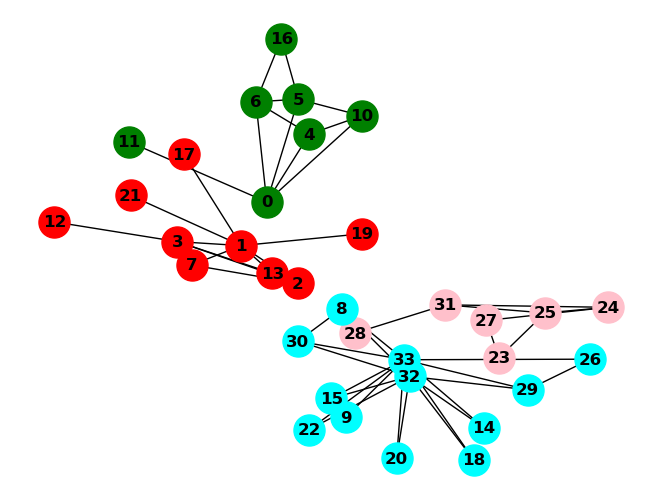

In [23]:
n1 = len(list(G1.nodes()))
nodes1 = list(G1.nodes())
A1 = np.zeros((n1 ,n1))
for i in range(n1):
    for j in range(n1):
        if (nodes1[i], nodes1[j]) in list(G1.edges()) or (nodes1[j], nodes1[i]) in list(G1.edges()): 
            A1[i,j] = 1 

# Number of edges
m1 = G1.number_of_edges()

# Degree vector k
k1 = np.array([degree for node, degree in G1.degree()])

# Outer product kk^T
kkT1 = np.outer(k1, k1)

# Compute kk^T / (2m)
kkT_div1 = kkT1 / (2 * m1)

# modularity matrix
B1 = A1 - kkT_div1

eigenvalues, eigenvectors = np.linalg.eig(B1)

max_index = np.argmax(eigenvalues)
max_eigenvector = eigenvectors[:, max_index]
    
eigenvalues = np.sort(eigenvalues)[::-1]  # descending order
print("Max eigenvalue: ", max(eigenvalues))

# splitting the subgraph for the 1st time
group1 = []
group2 = []
for value in max_eigenvector:
    if value < 0:
        group1.append(value)
    else:
        group2.append(value)

group1 = [nodes1[i] for i, val in enumerate(max_eigenvector) if val < 0]
group2 = [nodes1[i] for i, val in enumerate(max_eigenvector) if val >= 0]

print("Group 1 Nodes:", group1)
print("Group 2 Nodes:", group2)

pos = nx.spring_layout(G, seed=42)

G3 = G1.subgraph(group1)
pos_G3 = {node: pos[node] for node in G3.nodes()}
nx.draw(G3, pos_G3, with_labels=True, node_color='pink', font_weight='bold', node_size=500)

G4 = G1.subgraph(group2)
pos_G4 = {node: pos[node] for node in G4.nodes()}
nx.draw(G4, pos_G4, with_labels=True, node_color='cyan', font_weight='bold', node_size=500)


n2 = len(list(G2.nodes()))
nodes2 = list(G2.nodes())
A2 = np.zeros((n2 ,n2))
for i in range(n2):
    for j in range(n2):
        if (nodes2[i], nodes2[j]) in list(G2.edges()) or (nodes2[j], nodes2[i]) in list(G2.edges()): 
            A2[i,j] = 1 

# Number of edges
m2 = G2.number_of_edges()

# Degree vector k
k2 = np.array([degree for node, degree in G2.degree()])

# Outer product kk^T
kkT2 = np.outer(k2, k2)

# Compute kk^T / (2m)
kkT_div2 = kkT2 / (2 * m2)

# modularity matrix
B2 = A2 - kkT_div2

eigenvalues, eigenvectors = np.linalg.eig(B2)

max_index = np.argmax(eigenvalues)
max_eigenvector = eigenvectors[:, max_index]
    
eigenvalues = np.sort(eigenvalues)[::-1]  # descending order
print("Max eigenvalue: ", max(eigenvalues))

# splitting the subgraph for the 2nd time
group1 = []
group2 = []
for value in max_eigenvector:
    if value < 0:
        group1.append(value)
    else:
        group2.append(value)

group1 = [nodes2[i] for i, val in enumerate(max_eigenvector) if val < 0]
group2 = [nodes2[i] for i, val in enumerate(max_eigenvector) if val >= 0]

print("Group 1 Nodes:", group1)
print("Group 2 Nodes:", group2)

pos = nx.spring_layout(G, seed=42)

G5 = G2.subgraph(group1)
pos_G5 = {node: pos[node] for node in G5.nodes()}
nx.draw(G5, pos_G5, with_labels=True, node_color='red', font_weight='bold', node_size=500)

G6 = G2.subgraph(group2)
pos_G6 = {node: pos[node] for node in G6.nodes()}
nx.draw(G6, pos_G6, with_labels=True, node_color='green', font_weight='bold', node_size=500)

In [24]:
# computing node metrics after second split

# Create subgraphs for each group
G5 = G2.subgraph(group1)
G6 = G2.subgraph(group2)

# Compute node metrics for Group 1
print("Group 1 Node degrees:")
print(dict(G5.degree()))

print("Group 1 Clustering coefficient:")
print(nx.clustering(G5))

# Compute node metrics for Group 2
print("Group 2 Node degrees:")
print(dict(G6.degree()))

print("Group 2 Clustering coefficient:")
print(nx.clustering(G6))

print(nx.degree_centrality(G5))
print(nx.betweenness_centrality(G5))
print(nx.closeness_centrality(G5))

print(nx.degree_centrality(G6))
print(nx.betweenness_centrality(G6))
print(nx.closeness_centrality(G6))


Group 1 Node degrees:
{1: 7, 2: 4, 3: 5, 7: 3, 12: 1, 13: 3, 17: 1, 19: 1, 21: 1}
Group 1 Clustering coefficient:
{1: 0.23809523809523808, 2: 0.8333333333333334, 3: 0.5, 7: 1.0, 12: 0, 13: 1.0, 17: 0, 19: 0, 21: 0}
Group 2 Node degrees:
{0: 5, 4: 3, 5: 4, 6: 4, 10: 3, 11: 1, 16: 2}
Group 2 Clustering coefficient:
{0: 0.4, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 10: 0.6666666666666666, 11: 0, 16: 1.0}
{1: 0.875, 2: 0.5, 3: 0.625, 7: 0.375, 12: 0.125, 13: 0.375, 17: 0.125, 19: 0.125, 21: 0.125}
{1: 0.6547619047619048, 2: 0.011904761904761904, 3: 0.26190476190476186, 7: 0.0, 12: 0.0, 13: 0.0, 17: 0.0, 19: 0.0, 21: 0.0}
{1: 0.8888888888888888, 2: 0.6666666666666666, 3: 0.7272727272727273, 7: 0.6153846153846154, 12: 0.4444444444444444, 13: 0.6153846153846154, 17: 0.5, 19: 0.5, 21: 0.5}
{0: 0.8333333333333333, 4: 0.5, 5: 0.6666666666666666, 6: 0.6666666666666666, 10: 0.5, 11: 0.16666666666666666, 16: 0.3333333333333333}
{0: 0.3777777777777777, 4: 0.02222222222222222, 5: 0.15555555555555553, 6


G3 Splitting:
Max eigenvalue: 1.0
Group 1 Nodes: [25, 28, 31]
Group 2 Nodes: [23, 24, 27]

G4 Splitting:
Max eigenvalue: 1.1163048842075434
Group 1 Nodes: [32, 8, 14, 15, 18, 20, 22, 30]
Group 2 Nodes: [33, 9, 26, 29]

G5 Splitting:
Max eigenvalue: 1.0503127888313928
Group 1 Nodes: [2, 3, 7, 12, 13]
Group 2 Nodes: [1, 17, 19, 21]

G6 Splitting:
Max eigenvalue: 1.000000000000001
Group 1 Nodes: [5, 6, 16]
Group 2 Nodes: [0, 4, 10, 11]


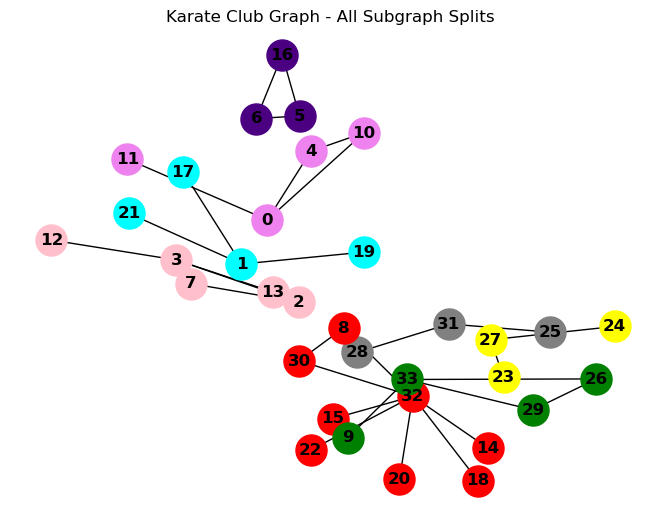

In [25]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assume G is the main Karate Club graph and G3, G4, G5, G6 are defined subgraphs
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)  # fixed positions for all subgraphs

# ========== SUBGRAPH G3 ==========
n3 = len(list(G3.nodes()))
if n3 < 2 or G3.number_of_edges() == 0:
    print("Subgraph G3 too small or no edges; stop splitting")
else:
    nodes3 = list(G3.nodes())
    A3 = np.zeros((n3, n3))
    for i in range(n3):
        for j in range(n3):
            if (nodes3[i], nodes3[j]) in list(G3.edges()) or (nodes3[j], nodes3[i]) in list(G3.edges()):
                A3[i, j] = 1

    m3 = G3.number_of_edges()
    k3 = np.array([degree for node, degree in G3.degree()])
    kkT3 = np.outer(k3, k3)
    B3 = A3 - kkT3 / (2 * m3)

    eigenvalues3, eigenvectors3 = np.linalg.eig(B3)
    max_index3 = np.argmax(eigenvalues3.real)
    max_eigenvector3 = eigenvectors3[:, max_index3].real

    group1 = [nodes3[i] for i, val in enumerate(max_eigenvector3) if val < 0]
    group2 = [nodes3[i] for i, val in enumerate(max_eigenvector3) if val >= 0]

    print("\nG3 Splitting:")
    print("Max eigenvalue:", max(eigenvalues3.real))
    print("Group 1 Nodes:", group1)
    print("Group 2 Nodes:", group2)

    G7 = G3.subgraph(group1)
    G8 = G3.subgraph(group2)
    nx.draw(G7, pos, with_labels=True, node_color='grey', font_weight='bold', node_size=500)
    nx.draw(G8, pos, with_labels=True, node_color='yellow', font_weight='bold', node_size=500)


# ========== SUBGRAPH G4 ==========
n4 = len(list(G4.nodes()))
if n4 < 2 or G4.number_of_edges() == 0:
    print("Subgraph G4 too small or no edges; stop splitting")
else:
    nodes4 = list(G4.nodes())
    A4 = np.zeros((n4, n4))
    for i in range(n4):
        for j in range(n4):
            if (nodes4[i], nodes4[j]) in list(G4.edges()) or (nodes4[j], nodes4[i]) in list(G4.edges()):
                A4[i, j] = 1

    m4 = G4.number_of_edges()
    k4 = np.array([degree for node, degree in G4.degree()])
    kkT4 = np.outer(k4, k4)
    B4 = A4 - kkT4 / (2 * m4)

    eigenvalues4, eigenvectors4 = np.linalg.eig(B4)
    max_index4 = np.argmax(eigenvalues4.real)
    max_eigenvector4 = eigenvectors4[:, max_index4].real

    group1 = [nodes4[i] for i, val in enumerate(max_eigenvector4) if val < 0]
    group2 = [nodes4[i] for i, val in enumerate(max_eigenvector4) if val >= 0]

    print("\nG4 Splitting:")
    print("Max eigenvalue:", max(eigenvalues4.real))
    print("Group 1 Nodes:", group1)
    print("Group 2 Nodes:", group2)

    G9 = G4.subgraph(group1)
    G10 = G4.subgraph(group2)
    nx.draw(G9, pos, with_labels=True, node_color='red', font_weight='bold', node_size=500)
    nx.draw(G10, pos, with_labels=True, node_color='green', font_weight='bold', node_size=500)


# ========== SUBGRAPH G5 ==========
n5 = len(list(G5.nodes()))
if n5 < 2 or G5.number_of_edges() == 0:
    print("Subgraph G5 too small or no edges; stop splitting")
else:
    nodes5 = list(G5.nodes())
    A5 = np.zeros((n5, n5))
    for i in range(n5):
        for j in range(n5):
            if (nodes5[i], nodes5[j]) in list(G5.edges()) or (nodes5[j], nodes5[i]) in list(G5.edges()):
                A5[i, j] = 1

    m5 = G5.number_of_edges()
    k5 = np.array([degree for node, degree in G5.degree()])
    kkT5 = np.outer(k5, k5)
    B5 = A5 - kkT5 / (2 * m5)

    eigenvalues5, eigenvectors5 = np.linalg.eig(B5)
    max_index5 = np.argmax(eigenvalues5.real)
    max_eigenvector5 = eigenvectors5[:, max_index5].real

    group1 = [nodes5[i] for i, val in enumerate(max_eigenvector5) if val < 0]
    group2 = [nodes5[i] for i, val in enumerate(max_eigenvector5) if val >= 0]

    print("\nG5 Splitting:")
    print("Max eigenvalue:", max(eigenvalues5.real))
    print("Group 1 Nodes:", group1)
    print("Group 2 Nodes:", group2)

    G11 = G5.subgraph(group1)
    G12 = G5.subgraph(group2)
    nx.draw(G11, pos, with_labels=True, node_color='pink', font_weight='bold', node_size=500)
    nx.draw(G12, pos, with_labels=True, node_color='cyan', font_weight='bold', node_size=500)


# ========== SUBGRAPH G6 ==========
n6 = len(list(G6.nodes()))
if n6 < 2 or G6.number_of_edges() == 0:
    print("Subgraph G6 too small or no edges; stop splitting")
else:
    nodes6 = list(G6.nodes())
    A6 = np.zeros((n6, n6))
    for i in range(n6):
        for j in range(n6):
            if (nodes6[i], nodes6[j]) in list(G6.edges()) or (nodes6[j], nodes6[i]) in list(G6.edges()):
                A6[i, j] = 1

    m6 = G6.number_of_edges()
    k6 = np.array([degree for node, degree in G6.degree()])
    kkT6 = np.outer(k6, k6)
    B6 = A6 - kkT6 / (2 * m6)

    eigenvalues6, eigenvectors6 = np.linalg.eig(B6)
    max_index6 = np.argmax(eigenvalues6.real)
    max_eigenvector6 = eigenvectors6[:, max_index6].real

    group1 = [nodes6[i] for i, val in enumerate(max_eigenvector6) if val < 0]
    group2 = [nodes6[i] for i, val in enumerate(max_eigenvector6) if val >= 0]

    print("\nG6 Splitting:")
    print("Max eigenvalue:", max(eigenvalues6.real))
    print("Group 1 Nodes:", group1)
    print("Group 2 Nodes:", group2)

    G13 = G6.subgraph(group1)
    G14 = G6.subgraph(group2)
    nx.draw(G13, pos, with_labels=True, node_color='indigo', font_weight='bold', node_size=500)
    nx.draw(G14, pos, with_labels=True, node_color='violet', font_weight='bold', node_size=500)

# Show all splits on one graph
plt.title("Karate Club Graph - All Subgraph Splits")
plt.axis('off')
plt.show()


CODE FOR A GENERAL GRAPH

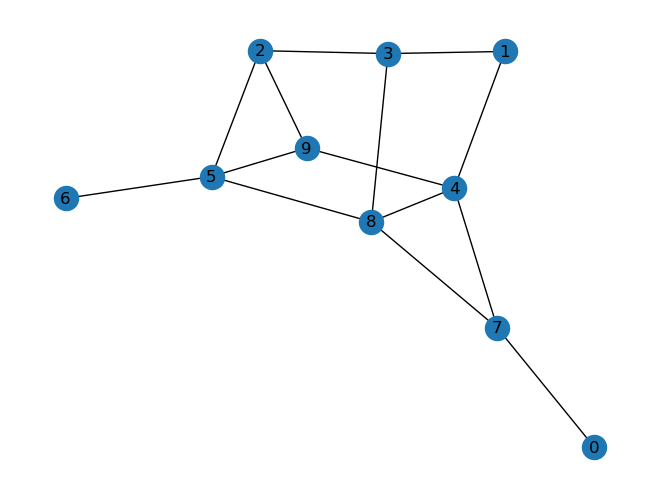

In [49]:
G = nx.erdos_renyi_graph(n=10, p=0.3)
pos = nx.spring_layout(G, seed = 42)
nx.draw(G, with_labels=True)
plt.show()

In [50]:
n1 = len(list(G.nodes()))
nodes1 = list(G.nodes())
A1 = np.zeros((n1 ,n1))
for i in range(n1):
    for j in range(n1):
        if (nodes1[i], nodes1[j]) in list(G1.edges()) or (nodes1[j], nodes1[i]) in list(G.edges()): 
            A1[i,j] = 1 
print(A1)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]]


In [51]:
m1 = G.number_of_edges()
k1 = np.array([degree for node, degree in G.degree()])
kkT1 = np.outer(k1, k1)
# Compute kk^T / (2m)
kkT_div1 = kkT1 / (2 * m1)
print(kkT_div)

[[1.64102564 0.92307692 1.02564103 ... 0.61538462 1.23076923 1.74358974]
 [0.92307692 0.51923077 0.57692308 ... 0.34615385 0.69230769 0.98076923]
 [1.02564103 0.57692308 0.64102564 ... 0.38461538 0.76923077 1.08974359]
 ...
 [0.61538462 0.34615385 0.38461538 ... 0.23076923 0.46153846 0.65384615]
 [1.23076923 0.69230769 0.76923077 ... 0.46153846 0.92307692 1.30769231]
 [1.74358974 0.98076923 1.08974359 ... 0.65384615 1.30769231 1.8525641 ]]


In [52]:
# modularity matrix
B1 = A1 - kkT_div1
print(B1)

[[-0.03571429 -0.07142857 -0.10714286 -0.10714286 -0.14285714 -0.14285714
  -0.03571429 -0.10714286 -0.14285714 -0.10714286]
 [-0.07142857 -0.14285714 -0.21428571  0.78571429 -0.28571429 -0.28571429
  -0.07142857 -0.21428571 -0.28571429 -0.21428571]
 [-0.10714286 -0.21428571 -0.32142857  0.67857143 -0.42857143 -0.42857143
  -0.10714286 -0.32142857 -0.42857143 -0.32142857]
 [-0.10714286  0.78571429  0.67857143 -0.32142857 -0.42857143 -0.42857143
  -0.10714286 -0.32142857 -0.42857143 -0.32142857]
 [-0.14285714  0.71428571 -0.42857143 -0.42857143 -0.57142857 -0.57142857
  -0.14285714 -0.42857143 -0.57142857 -0.42857143]
 [-0.14285714 -0.28571429  0.57142857 -0.42857143 -0.57142857 -0.57142857
  -0.14285714 -0.42857143 -0.57142857 -0.42857143]
 [-0.03571429 -0.07142857 -0.10714286 -0.10714286 -0.14285714  0.85714286
  -0.03571429 -0.10714286 -0.14285714 -0.10714286]
 [ 0.89285714 -0.21428571 -0.32142857 -0.32142857  0.57142857 -0.42857143
  -0.10714286 -0.32142857 -0.42857143 -0.32142857]


In [53]:
eigenvalues, eigenvectors = np.linalg.eig(B1)
max_index = np.argmax(eigenvalues.real)
max_eigenvector = eigenvectors[:, max_index].real
eigenvalues = np.sort(eigenvalues)[::-1]  # descending order
print("Max eigenvalue: ", max(eigenvalues))

Max eigenvalue:  (0.8694868369003722+0j)


In [54]:
group1 = []
group2 = []
for value in max_eigenvector:
    if value < 0:
        group1.append(value)
    else:
        group2.append(value)
            
#assigning eigenvector values to nodoes
group1 = [nodes1[i] for i, val in enumerate(max_eigenvector) if val < 0]
group2 = [nodes1[i] for i, val in enumerate(max_eigenvector) if val >= 0]

print("Group 1 Nodes:", group1)
print("Group 2 Nodes:", group2)

Group 1 Nodes: [1, 2, 3, 4, 9]
Group 2 Nodes: [0, 5, 6, 7, 8]


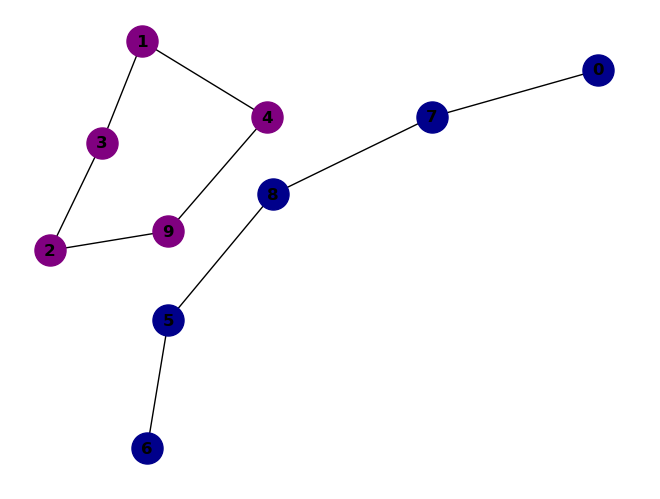

In [55]:
G1 = G.subgraph(group1)
pos = nx.spring_layout(G, seed = 42)
nx.draw(G1, pos, with_labels=True, node_color='purple', font_weight='bold', node_size=500)

G2 = G.subgraph(group2)
pos = nx.spring_layout(G, seed = 42)
nx.draw(G2, pos, with_labels=True, node_color='darkblue', font_weight='bold', node_size=500)

Max eigenvalue:  4.299408554853533
Group 1 Nodes: [0, 2, 3, 6, 8, 10, 11, 13, 14, 16, 20, 23, 24]
Group 2 Nodes: [1, 4, 5, 7, 9, 12, 15, 17, 18, 19, 21, 22]


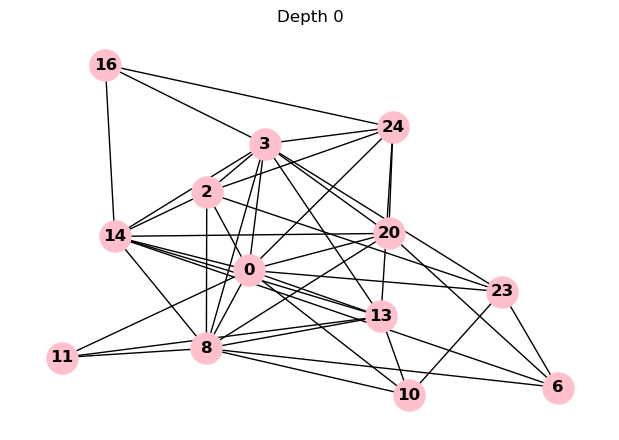

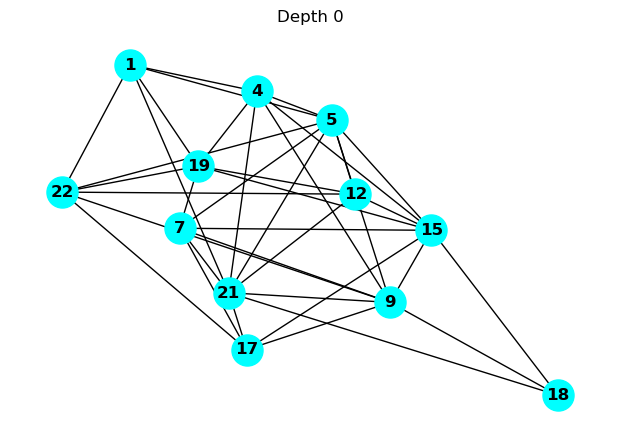

Group 1 Node degrees:
{0: 10, 2: 6, 3: 9, 6: 4, 8: 9, 10: 4, 11: 3, 13: 7, 14: 8, 16: 3, 20: 6, 23: 5, 24: 6}
Group 1 Clustering coefficient:
{0: 0.5111111111111111, 2: 0.6666666666666666, 3: 0.5555555555555556, 6: 0.5, 8: 0.5, 10: 0.6666666666666666, 11: 1.0, 13: 0.5714285714285714, 14: 0.5357142857142857, 16: 0.6666666666666666, 20: 0.6666666666666666, 23: 0.4, 24: 0.5333333333333333}
Group 2 Node degrees:
{1: 5, 4: 6, 5: 8, 7: 6, 9: 8, 12: 5, 15: 8, 17: 5, 18: 3, 19: 6, 21: 8, 22: 6}
Group 2 Clustering coefficient:
{1: 0.6, 4: 0.6, 5: 0.5357142857142857, 7: 0.6, 9: 0.5357142857142857, 12: 0.5, 15: 0.42857142857142855, 17: 0.6, 18: 0.6666666666666666, 19: 0.4, 21: 0.39285714285714285, 22: 0.4}
{0: 0.8333333333333333, 2: 0.5, 3: 0.75, 6: 0.3333333333333333, 8: 0.75, 10: 0.3333333333333333, 11: 0.25, 13: 0.5833333333333333, 14: 0.6666666666666666, 16: 0.25, 20: 0.5, 23: 0.41666666666666663, 24: 0.5}
{0: 0.12941919191919193, 2: 0.017424242424242422, 3: 0.09196127946127947, 6: 0.01186868

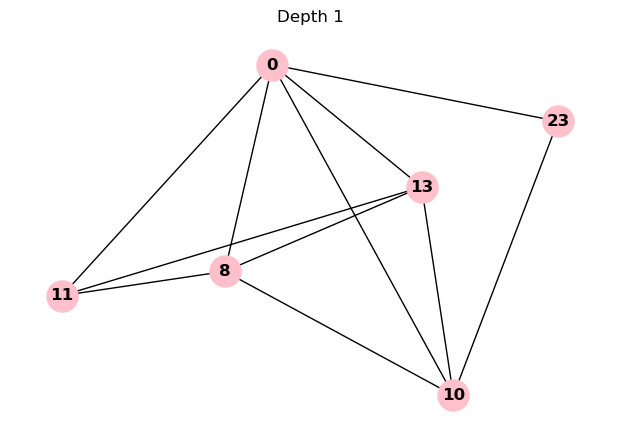

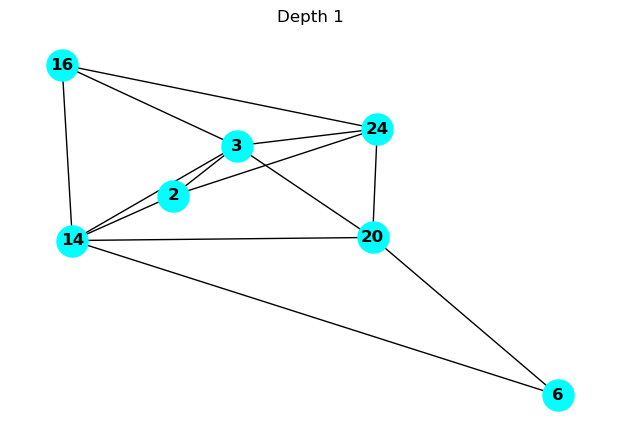

  Group 1 Node degrees:
{0: 5, 8: 4, 10: 4, 11: 3, 13: 4, 23: 2}
  Group 1 Clustering coefficient:
{0: 0.6, 8: 0.8333333333333334, 10: 0.6666666666666666, 11: 1.0, 13: 0.8333333333333334, 23: 1.0}
  Group 2 Node degrees:
{2: 3, 3: 5, 6: 2, 14: 5, 16: 3, 20: 4, 24: 4}
  Group 2 Clustering coefficient:
{2: 0.6666666666666666, 3: 0.6, 6: 1.0, 14: 0.4, 16: 0.6666666666666666, 20: 0.5, 24: 0.5}
{0: 1.0, 8: 0.8, 10: 0.8, 11: 0.6000000000000001, 13: 0.8, 23: 0.4}
{0: 0.2333333333333333, 8: 0.03333333333333333, 10: 0.1, 11: 0.0, 13: 0.03333333333333333, 23: 0.0}
{0: 1.0, 8: 0.8333333333333334, 10: 0.8333333333333334, 11: 0.7142857142857143, 13: 0.8333333333333334, 23: 0.625}
{2: 0.5, 3: 0.8333333333333333, 6: 0.3333333333333333, 14: 0.8333333333333333, 16: 0.5, 20: 0.6666666666666666, 24: 0.6666666666666666}
{2: 0.016666666666666666, 3: 0.08333333333333333, 6: 0.0, 14: 0.2333333333333333, 16: 0.016666666666666666, 20: 0.11666666666666667, 24: 0.06666666666666667}
{2: 0.6666666666666666, 3: 0.8

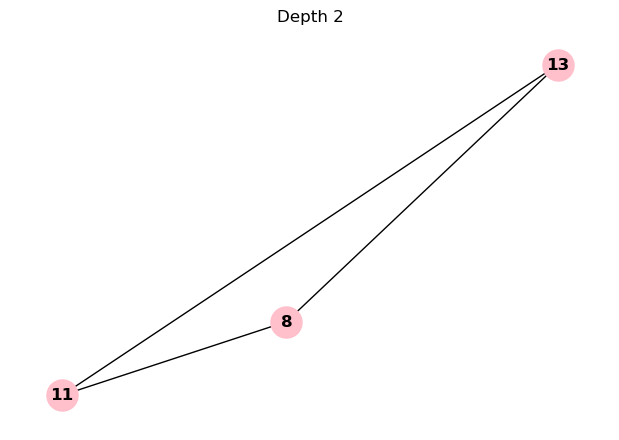

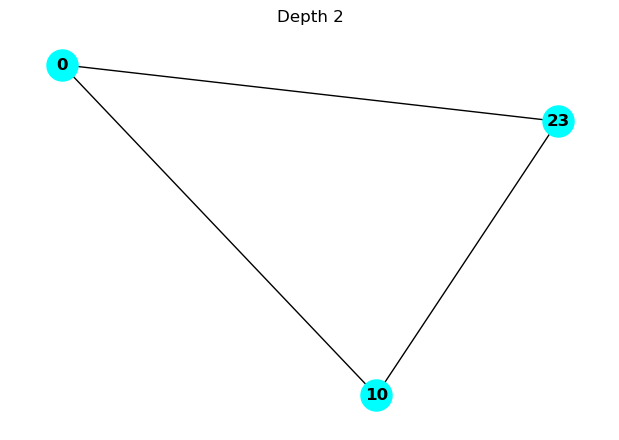

    Group 1 Node degrees:
{8: 2, 11: 2, 13: 2}
    Group 1 Clustering coefficient:
{8: 1.0, 11: 1.0, 13: 1.0}
    Group 2 Node degrees:
{0: 2, 10: 2, 23: 2}
    Group 2 Clustering coefficient:
{0: 1.0, 10: 1.0, 23: 1.0}
{8: 1.0, 11: 1.0, 13: 1.0}
{8: 0.0, 11: 0.0, 13: 0.0}
{8: 1.0, 11: 1.0, 13: 1.0}
{0: 1.0, 10: 1.0, 23: 1.0}
{0: 0.0, 10: 0.0, 23: 0.0}
{0: 1.0, 10: 1.0, 23: 1.0}
        Subgraph is too small or no edges; stop splitting
        Subgraph is too small or no edges; stop splitting
    Max eigenvalue:  1.02641405808756
    Group 1 Nodes: [6, 14, 20]
    Group 2 Nodes: [2, 3, 16, 24]


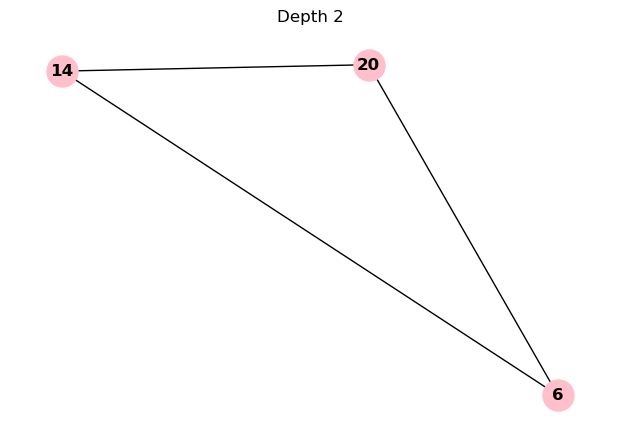

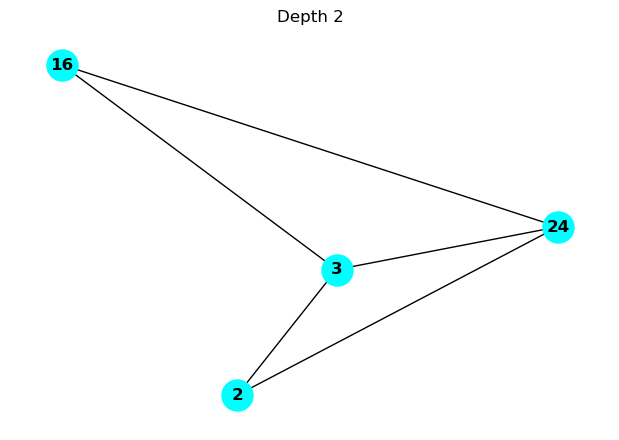

    Group 1 Node degrees:
{20: 2, 6: 2, 14: 2}
    Group 1 Clustering coefficient:
{20: 1.0, 6: 1.0, 14: 1.0}
    Group 2 Node degrees:
{2: 2, 3: 3, 16: 2, 24: 3}
    Group 2 Clustering coefficient:
{2: 1.0, 3: 0.6666666666666666, 16: 1.0, 24: 0.6666666666666666}
{20: 1.0, 6: 1.0, 14: 1.0}
{20: 0.0, 6: 0.0, 14: 0.0}
{20: 1.0, 6: 1.0, 14: 1.0}
{2: 0.6666666666666666, 3: 1.0, 16: 0.6666666666666666, 24: 1.0}
{2: 0.0, 3: 0.16666666666666666, 16: 0.0, 24: 0.16666666666666666}
{2: 0.75, 3: 1.0, 16: 0.75, 24: 1.0}
        Subgraph is too small or no edges; stop splitting
        Subgraph is too small or no edges; stop splitting
  Max eigenvalue:  1.8903391268867569
  Group 1 Nodes: [1, 4, 5, 12, 19, 22]
  Group 2 Nodes: [7, 9, 15, 17, 18, 21]


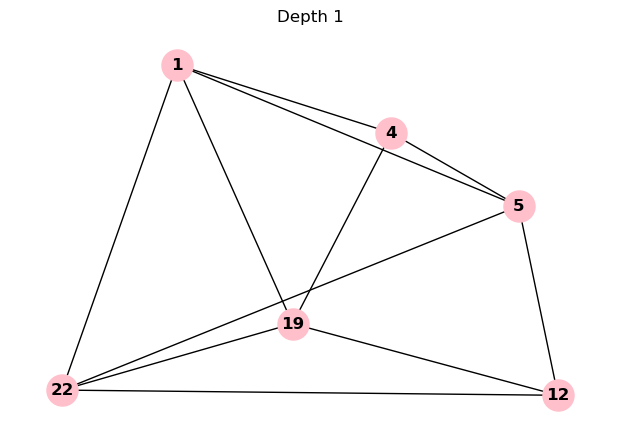

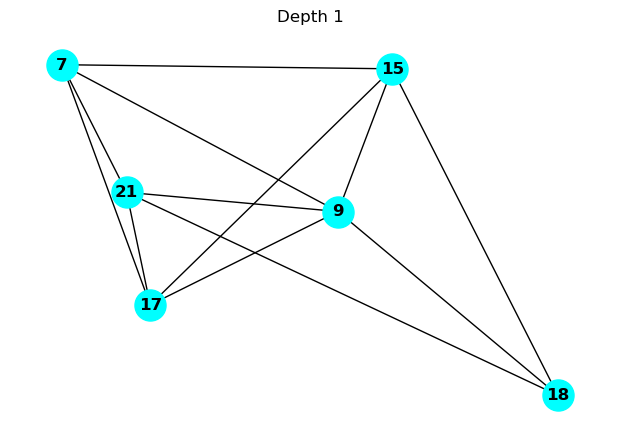

  Group 1 Node degrees:
{1: 4, 4: 3, 5: 4, 12: 3, 19: 4, 22: 4}
  Group 1 Clustering coefficient:
{1: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 12: 0.6666666666666666, 19: 0.5, 22: 0.6666666666666666}
  Group 2 Node degrees:
{7: 4, 9: 5, 15: 4, 17: 4, 18: 3, 21: 4}
  Group 2 Clustering coefficient:
{7: 0.8333333333333334, 9: 0.7, 15: 0.6666666666666666, 17: 0.8333333333333334, 18: 0.6666666666666666, 21: 0.6666666666666666}
{1: 0.8, 4: 0.6000000000000001, 5: 0.8, 12: 0.6000000000000001, 19: 0.8, 22: 0.8}
{1: 0.05833333333333333, 4: 0.025, 5: 0.11666666666666665, 12: 0.025, 19: 0.11666666666666665, 22: 0.05833333333333333}
{1: 0.8333333333333334, 4: 0.7142857142857143, 5: 0.8333333333333334, 12: 0.7142857142857143, 19: 0.8333333333333334, 22: 0.8333333333333334}
{7: 0.8, 9: 1.0, 15: 0.8, 17: 0.8, 18: 0.6000000000000001, 21: 0.8}
{7: 0.025, 9: 0.09166666666666666, 15: 0.06666666666666667, 17: 0.025, 18: 0.025, 21: 0.06666666666666667}
{7: 0.8333333333333334, 9: 1.0, 15: 0.833333

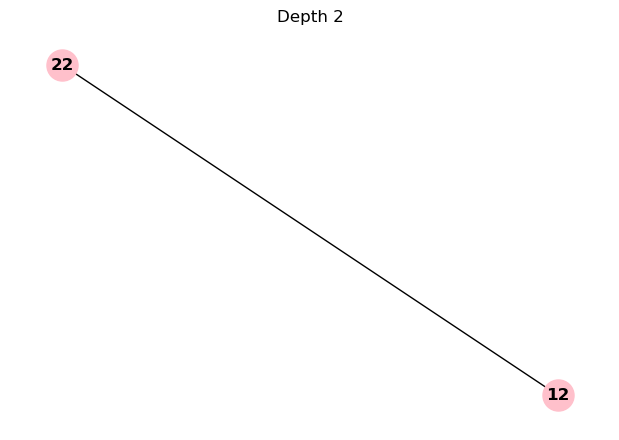

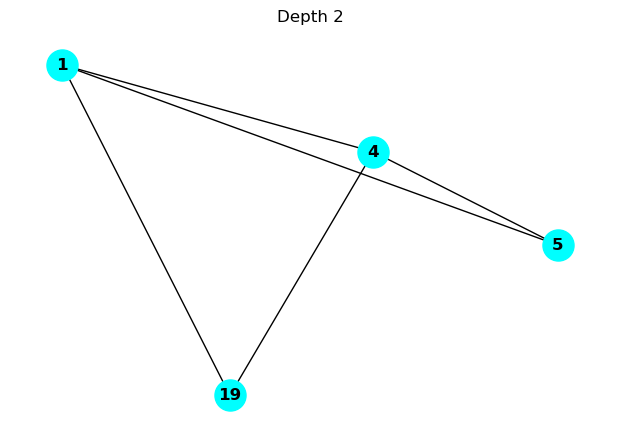

    Group 1 Node degrees:
{12: 1, 22: 1}
    Group 1 Clustering coefficient:
{12: 0, 22: 0}
    Group 2 Node degrees:
{1: 3, 4: 3, 5: 2, 19: 2}
    Group 2 Clustering coefficient:
{1: 0.6666666666666666, 4: 0.6666666666666666, 5: 1.0, 19: 1.0}
{12: 1.0, 22: 1.0}
{12: 0.0, 22: 0.0}
{12: 1.0, 22: 1.0}
{1: 1.0, 4: 1.0, 5: 0.6666666666666666, 19: 0.6666666666666666}
{1: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.0, 19: 0.0}
{1: 1.0, 4: 1.0, 5: 0.75, 19: 0.75}
        Subgraph is too small or no edges; stop splitting
        Subgraph is too small or no edges; stop splitting
    Max eigenvalue:  0.36333374519514555
    Group 1 Nodes: [9, 15, 18, 21]
    Group 2 Nodes: [7, 17]


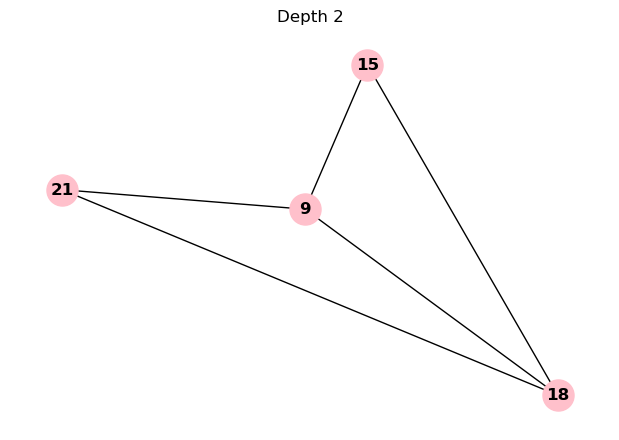

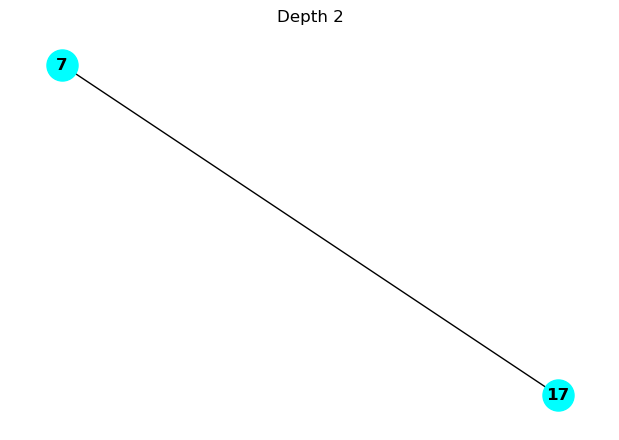

    Group 1 Node degrees:
{9: 3, 15: 2, 18: 3, 21: 2}
    Group 1 Clustering coefficient:
{9: 0.6666666666666666, 15: 1.0, 18: 0.6666666666666666, 21: 1.0}
    Group 2 Node degrees:
{17: 1, 7: 1}
    Group 2 Clustering coefficient:
{17: 0, 7: 0}
{9: 1.0, 15: 0.6666666666666666, 18: 1.0, 21: 0.6666666666666666}
{9: 0.16666666666666666, 15: 0.0, 18: 0.16666666666666666, 21: 0.0}
{9: 1.0, 15: 0.75, 18: 1.0, 21: 0.75}
{17: 1.0, 7: 1.0}
{17: 0.0, 7: 0.0}
{17: 1.0, 7: 1.0}
        Subgraph is too small or no edges; stop splitting
        Subgraph is too small or no edges; stop splitting


In [7]:
###### Code for any general graph ######




import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def recursive_split(G, pos=None, depth=0, max_depth=3): # depth and max depth helps in recursive splitting
    
    if len(G.nodes()) < 3 or G.number_of_edges() == 0 or depth >= max_depth:
        print(f" {'  '*depth} Subgraph is too small or no edges; stop splitting")
        return
    if pos is None:
        pos = nx.spring_layout(G, seed=42)
    
    n1 = len(list(G.nodes()))
    nodes1 = list(G.nodes())
    A1 = np.zeros((n1 ,n1))
    for i in range(n1):
        for j in range(n1):
            if (nodes1[i], nodes1[j]) in list(G.edges()) or (nodes1[j], nodes1[i]) in list(G.edges()): 
                    A1[i,j] = 1 
            
    m1 = G.number_of_edges()
    k1 = np.array([degree for node, degree in G.degree()])
    kkT1 = np.outer(k1, k1)
    # Compute kk^T / (2m)
    kkT_div1 = kkT1 / (2 * m1)

    
    # modularity matrix
    B1 = A1 - kkT_div1
    
    eigenvalues, eigenvectors = np.linalg.eig(B1)
    max_index = np.argmax(eigenvalues.real)
    max_eigenvector = eigenvectors[:, max_index].real
    eigenvalues = np.sort(eigenvalues)[::-1]  # descending order
    print(f"{'  '*depth}Max eigenvalue: ", max(eigenvalues))
    
        
    # splitting the subgraph for the 1st time
    group1 = []
    group2 = []
    for value in max_eigenvector:
        if value < 0:
            group1.append(value)
        else:
            group2.append(value)
        
    #assigning eigenvector values to nodes
    group1 = [nodes1[i] for i, val in enumerate(max_eigenvector) if val < 0]
    group2 = [nodes1[i] for i, val in enumerate(max_eigenvector) if val >= 0]

    if not group1 or not group2:
        print(f"{'  '*depth}Cannot split further.")
        return

    print(f"{'  '*depth}Group 1 Nodes:", group1)
    print(f"{'  '*depth}Group 2 Nodes:", group2)

    plt.figure(figsize=(6, 4))
    G_sub1 = G.subgraph(group1).copy()
    pos_G_sub1 = {node: pos[node] for node in G_sub1.nodes()}
    nx.draw(G_sub1, pos_G_sub1, with_labels=True, node_color='pink', font_weight='bold', node_size=500)
    plt.title(f"Depth {depth}")
    plt.show()
    
    plt.figure(figsize=(6, 4))
    G_sub2 = G.subgraph(group2).copy()
    pos_G_sub2 = {node: pos[node] for node in G_sub2.nodes()}
    nx.draw(G_sub2, pos_G_sub2, with_labels=True, node_color='cyan', font_weight='bold', node_size=500)
    plt.title(f"Depth {depth}")
    plt.show()

    # computing node metrics after each split


    # Compute node metrics for Group 1
    print(f"{'  '*depth}Group 1 Node degrees:")
    print(dict(G_sub1.degree()))

    print(f"{'  '*depth}Group 1 Clustering coefficient:")
    print(nx.clustering(G_sub1))

    # Compute node metrics for Group 2
    print(f"{'  '*depth}Group 2 Node degrees:")
    print(dict(G_sub2.degree()))

    print(f"{'  '*depth}Group 2 Clustering coefficient:")
    print(nx.clustering(G_sub2))

    print(nx.degree_centrality(G_sub1))
    print(nx.betweenness_centrality(G_sub1))
    print(nx.closeness_centrality(G_sub1))
    
    print(nx.degree_centrality(G_sub2))
    print(nx.betweenness_centrality(G_sub2))
    print(nx.closeness_centrality(G_sub2))
    
    recursive_split(G_sub1, pos, depth=depth+1, max_depth=max_depth)
    recursive_split(G_sub2, pos, depth=depth+1, max_depth=max_depth)


G = nx.erdos_renyi_graph(n = 25,p = 0.35, seed = 42) # N = number of nodes, P = probability of generating an edge
recursive_split(G)